# Assignment 7

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
data1 = pd.read_csv('kyphosis.csv')
data1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'kyphosis.csv'

In [ ]:
data1.shape

In [ ]:
data1.describe()

In [ ]:
data1.isnull().sum()

In [7]:
data1['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

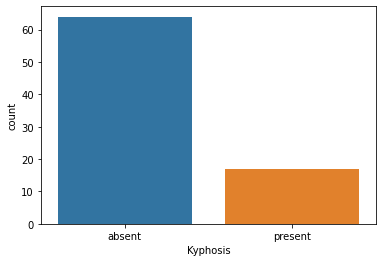

In [8]:
sns.countplot(x='Kyphosis', data=data1)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['Kyphosis'] = le.fit_transform(data1['Kyphosis'])
data1.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [12]:
x = data1.iloc[:,1:]
y = data1.iloc[:,0] 

In [13]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [14]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = log_reg.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('\n\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
print('\n\nClassification Report: \n\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7647058823529411


Confusion Matrix: 

 [[13  1]
 [ 3  0]]


Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17



# KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_model = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn_clf_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [28]:
knn_y_pred = knn_clf_model.predict(x_test)

print('Accuracy Score: \n\n', accuracy_score(y_test, knn_y_pred))
print('\n\nConfusion Matrix: \n\n', confusion_matrix(y_test, knn_y_pred))
print('\n\nClassification Report: \n\n', classification_report(y_test, knn_y_pred))

Accuracy Score: 

 0.5882352941176471


Confusion Matrix: 

 [[10  4]
 [ 3  0]]


Classification Report: 

               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.00      0.00      0.00         3

    accuracy                           0.59        17
   macro avg       0.38      0.36      0.37        17
weighted avg       0.63      0.59      0.61        17



# Decession Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_model = DecisionTreeClassifier()
dt_clf_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
dt_y_pred = dt_clf_model.predict(x_test)

print('Accuracy Score: \n\n', accuracy_score(y_test, dt_y_pred))
print('\n\nConfusion Matrix: \n\n', confusion_matrix(y_test, dt_y_pred))
print('\n\nClassification Report: \n\n', classification_report(y_test, dt_y_pred))

Accuracy Score: 

 0.35294117647058826


Confusion Matrix: 

 [[6 8]
 [3 0]]


Classification Report: 

               precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.00      0.00      0.00         3

    accuracy                           0.35        17
   macro avg       0.33      0.21      0.26        17
weighted avg       0.55      0.35      0.43        17

